In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# load feature variables and their names
X = np.loadtxt("nuclear_x.csv", delimiter=",", skiprows=1)
with open("nuclear_x.csv", "r") as f:
    X_colnames = next(csv.reader(f))
# load salaries
y = np.loadtxt("nuclear_y.csv", delimiter=",", skiprows=1)

In [2]:
def GD(X, y, Lambda, theta):
    n = len(X)
    soft_margin = np.zeros(n)
    gradient = np.zeros(len(X[0])+1)
    b = theta[0]
    w = theta[1:]
    for i in range(len(X)):
        soft_margin[i] = 1 - y[i] * (np.dot(w, X[i,:]) + b)
        
    soft_margin[soft_margin < 0] = 0
    soft_margin[soft_margin > 0] = 1

    gradient[0] = (-1/n) * sum(soft_margin*y)
    gradient[1:] = np.array([sum(soft_margin*(1/n)*(-y*X[:,0] + Lambda*w[0])), sum(soft_margin*(1/n)*(-y*X[:,1] + Lambda*w[1]))])
    
    return gradient

In [3]:
def checkObjective(X, y, Lambda, theta):
    n = len(X)
    Loss_i = np.zeros(n)
    b = theta[0]
    w = theta[1:]
    for i in range(len(X)):
        Loss_i[i] = (1/n) * max(0, 1 - y[i] * (np.dot(w, X[i,:]) + b))
    Loss = sum(Loss_i) + (Lambda/2)*np.linalg.norm(theta[1:])
    return Loss

In [4]:
# Problem1-3 gradient decent
#np.random.seed(0)
theta_0_GD = np.random.rand(len(X[0])+1) # theta = [b w].T

steps = 40
Loss_GD = np.zeros(steps-1)
Lambda = 0.001
theta_GD = theta_0_GD
for k in range(1,steps):
    theta_GD = theta_GD - (100/k) * GD(X, y, Lambda, theta_GD) # theta_k+1 = theta_k - alpha_k * g(theta_k)
    #print(theta)
    Loss_GD[k-1] = checkObjective(X, y, Lambda, theta_GD)
    #print(Loss)

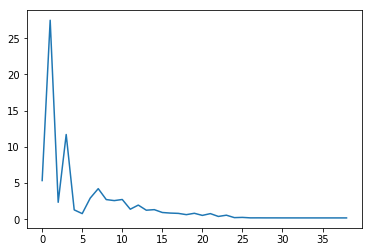

In [5]:
plt.plot(Loss_GD)
plt.show()

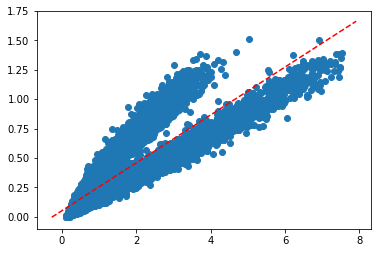

In [18]:
plt.scatter(X[:,0],X[:,1])
slope = -theta_GD[1] / theta_GD[2]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = slope * x_vals + (-theta_GD[0]/theta_GD[2])
plt.plot(x_vals, y_vals, '--', color='red')
plt.show()

In [20]:
theta_GD

array([-1.08775537, -4.20154906, 20.65468971])

In [21]:
Loss_GD[-1]

0.17706469002736333

In [9]:
def SGM(X, y, Lambda, theta):
    n = len(X)
    soft_margin = np.zeros(n)
    gradient = np.zeros((len(X), len(X[0])+1))
    b = theta[0]
    w = theta[1:]
    order = np.random.permutation(n)
    for i in range(len(X)):
        soft_margin[order[i]] = 1 - y[order[i]] * (np.dot(w, X[order[i],:]) + b)
    soft_margin[soft_margin < 0] = 0
    soft_margin[soft_margin > 0] = 1

    gradient[:,0] = (-1/n) * soft_margin * y
    gradient[:,1:] = np.array([soft_margin*(1/n)*(-y*X[:,0] + Lambda*w[0]), soft_margin*(1/n)*(-y*X[:,1] + Lambda*w[1])]).T
    
    return gradient

In [10]:
# Problem1-3 stochastic gradient method
#np.random.seed(0)
theta_0 = np.random.rand(len(X[0])+1) # theta = [b w].T

n = len(X)
it = 40
steps = it*n
Loss = []#np.zeros(steps-1)
Lambda = 0.001
theta = theta_0
for k in range(1,it):
    #if (k-1) % n == 0:
    J_temp = SGM(X, y, Lambda, theta)
    for i in range(n):
        theta = theta - (100/k) * J_temp[i,:] # theta_k+1 = theta_k - alpha_k * gi(theta_k)
        #theta = theta - (100/((k-1)/n + 1)) * J_temp[i,:] # theta_k+1 = theta_k - alpha_k * gi(theta_k)
        #print(theta)
        #Loss[k-1+i] = checkObjective(X, y, Lambda, theta)
        #print(k-1+i)
        Loss.append(checkObjective(X, y, Lambda, theta))
        #print(Loss)
        if (i+1) % 5000 == 0:
            print('[k, i]: ', [k, i])
            print(Loss[-1])

[k, i]:  [1, 4999]
13.279524368150613
[k, i]:  [1, 9999]
26.807850824331823
[k, i]:  [1, 14999]
40.4911721614336
[k, i]:  [2, 4999]
43.97356389907819
[k, i]:  [2, 9999]
34.36788320413823
[k, i]:  [2, 14999]
24.936821510208464
[k, i]:  [3, 4999]
8.954290021813433
[k, i]:  [3, 9999]
2.659479570299297
[k, i]:  [3, 14999]
3.214858914877923
[k, i]:  [4, 4999]
5.028651374763038
[k, i]:  [4, 9999]
1.165575692847243
[k, i]:  [4, 14999]
2.8716606433199634
[k, i]:  [5, 4999]
3.2635207965341224
[k, i]:  [5, 9999]
0.32822319073847506
[k, i]:  [5, 14999]
3.5216439416711287
[k, i]:  [6, 4999]
4.339838850788406
[k, i]:  [6, 9999]
1.7669862461527068
[k, i]:  [6, 14999]
0.596227680674119
[k, i]:  [7, 4999]
0.6723870412813392
[k, i]:  [7, 9999]
1.4582160976975491
[k, i]:  [7, 14999]
3.8071830229844523
[k, i]:  [8, 4999]
4.295099744333947
[k, i]:  [8, 9999]
2.3647773927827025
[k, i]:  [8, 14999]
0.5912820301641355
[k, i]:  [9, 4999]
0.46615543154865424
[k, i]:  [9, 9999]
1.8004277705526812
[k, i]:  [9, 1

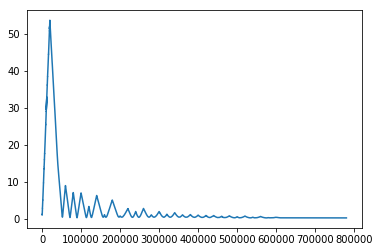

In [11]:
plt.plot(Loss)
plt.show()

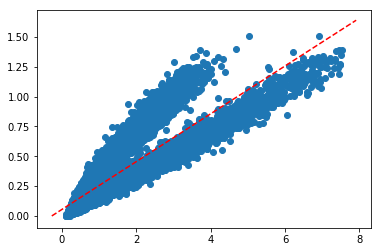

In [19]:
plt.scatter(X[:,0],X[:,1])
slope = -theta[1] / theta[2]
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = slope * x_vals + (-theta[0]/theta[2])
plt.plot(x_vals, y_vals, '--', color='red')
plt.show()

In [13]:
print([X[index_min,0], X[index_max,0]], [y1, y2])

[0.38204828657061907, 3.2769927100934244] [-0.003303984298747231, 7.531590858610133]


In [14]:
theta

array([-0.97315986, -3.62502033, 18.0781542 ])

In [22]:
Loss[-1]

0.1846215997454534